In [1]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


In [2]:
import helper
import numpy as np
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


In [3]:
def normalize(x):
    return x/255


In [4]:
def one_hot_encode(x):
    import numpy as np
    return np.eye(10)[x]


In [5]:
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)


In [6]:
import pickle
import problem_unittests as tests
import helper
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
      
    return tf.placeholder(tf.float32,shape=(None,image_shape[0],image_shape[1],image_shape[2]),name='x')


def neural_net_label_input(n_classes):
    
    return tf.placeholder(tf.float32,shape=(None,n_classes),name='y')


def neural_net_keep_prob_input():
  
    return tf.placeholder(tf.float32,name='keep_prob')

tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)


Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


In [8]:
def conv_net(x, keep_prob):
    import tensorflow as tf
    alpha=0.2
   
    image=tf.layers.conv2d(x,16 , 1, strides=1, padding='same', activation=None)
    image=tf.layers.dropout(image,rate=0.2)
    conv1= tf.layers.batch_normalization(image, training=True)
    conv1=tf.maximum(alpha*conv1,conv1)
    conv1=tf.layers.conv2d(conv1,12,3,strides=1,padding='same',activation=None)
    image=tf.concat([conv1,image],3)
    #image=tf.layers.dropout(image,rate=0.2)
    conv1= tf.layers.batch_normalization(image, training=True)
    conv1=tf.maximum(alpha*conv1,conv1)
    conv1=tf.layers.conv2d(conv1,12,3,strides=1,padding='same',activation=None)
    image=tf.concat([conv1,image],3)
    #image=tf.layers.dropout(image,rate=0.2)
    conv1= tf.layers.batch_normalization(image, training=True)
    conv1=tf.maximum(alpha*conv1,conv1)
    conv1=tf.layers.conv2d(conv1,12,3,strides=1,padding='same',activation=None)
    image=tf.concat([conv1,image],3)
    #image=tf.layers.dropout(image,rate=0.2)
    conv1= tf.layers.batch_normalization(image, training=True)
    conv1=tf.maximum(alpha*conv1,conv1)
    conv1=tf.layers.conv2d(conv1,12,3,strides=1,padding='same',activation=None)
    image=tf.concat([conv1,image],3)
    image=tf.layers.dropout(image,rate=0.2)
    
    image1=tf.layers.batch_normalization(image,training=True)
    image1=tf.layers.conv2d(image1,64 , 1, strides=1, padding='same', activation=None)
    image1=tf.layers.average_pooling2d(inputs=image1,pool_size=[2,2],strides=2)
        
    #image1=tf.layers.conv2d(image1,80,1,strides=1,padding='same',activation=None)
    conv2=tf.layers.batch_normalization(image1, training=True)
    conv2=tf.maximum(alpha*conv2,conv2)
    conv2=tf.layers.conv2d(conv2,12,3,strides=1,padding='same',activation=None)
    #image1=tf.concat([conv2,image1],3)
    image1=tf.layers.dropout(image1,rate=0.2)
    conv2=tf.layers.batch_normalization(image1, training=True)
    conv2=tf.maximum(alpha*conv2,conv2)
    conv2=tf.layers.conv2d(conv2,12,3,strides=1,padding='same',activation=None)
    image1=tf.concat([conv2,image1],3)
    #image1=tf.layers.dropout(image1,rate=0.2)
    conv2=tf.layers.batch_normalization(image1, training=True)
    conv2=tf.maximum(alpha*conv2,conv2)
    conv2=tf.layers.conv2d(conv2,12,3,strides=1,padding='same',activation=None)
    image1=tf.concat([conv2,image1],3)
    #image1=tf.layers.dropout(image1,rate=0.2)
    conv2=tf.layers.batch_normalization(image1, training=True)
    conv2=tf.maximum(alpha*conv2,conv2)
    conv2=tf.layers.conv2d(conv2,12,3,strides=1,padding='same',activation=None)
    image1=tf.concat([conv2,image1],3)
    #image1=tf.layers.dropout(image1,rate=0.2)
    conv2=tf.layers.batch_normalization(image1, training=True)
    conv2=tf.maximum(alpha*conv2,conv2)
    conv2=tf.layers.conv2d(conv2,12,3,strides=1,padding='same',activation=None)
    image1=tf.concat([conv2,image1],3)
    #image1=tf.layers.dropout(image1,rate=0.2)
    conv2=tf.layers.batch_normalization(image1, training=True)
    conv2=tf.maximum(alpha*conv2,conv2)
    conv2=tf.layers.conv2d(conv2,12,3,strides=1,padding='same',activation=None)
    image1=tf.concat([conv2,image1],3)
    image1=tf.layers.dropout(image1,rate=0.2)
    
    image2=tf.layers.batch_normalization(image1,training=True)
    image2=tf.layers.conv2d(image2,136 , 1, strides=1, padding='same', activation=None)
    image2=tf.layers.average_pooling2d(inputs=image2,pool_size=[2,2],strides=2)
    
    #image2=tf.layers.conv2d(image2,144,1,strides=1,padding='same',activation=None)
    conv3=tf.layers.batch_normalization(image2, training=True)
    conv3=tf.maximum(alpha*conv3,conv3)
    conv3=tf.layers.conv2d(conv3,12,3,strides=1,padding='same',activation=None)
    image2=tf.concat([conv3,image2],3)
    #image2=tf.layers.dropout(image2,rate=0.2)
    conv3=tf.layers.batch_normalization(image2, training=True)
    conv3=tf.maximum(alpha*conv3,conv3)
    conv3=tf.layers.conv2d(conv3,12,3,strides=1,padding='same',activation=None)
    image2=tf.concat([conv3,image2],3)
    #image2=tf.layers.dropout(image2,rate=0.2)
    conv3=tf.layers.batch_normalization(image2, training=True)
    conv3=tf.maximum(alpha*conv3,conv3)
    conv3=tf.layers.conv2d(conv3,12,3,strides=1,padding='same',activation=None)
    image2=tf.concat([conv3,image2],3)
    #image2=tf.layers.dropout(image2,rate=0.2)
    conv3=tf.layers.batch_normalization(image2, training=True)
    conv3=tf.maximum(alpha*conv3,conv3)
    conv3=tf.layers.conv2d(conv3,12,3,strides=1,padding='same',activation=None)
    image2=tf.concat([conv3,image2],3)
    #image2=tf.layers.dropout(image2,rate=0.2)
    conv3=tf.layers.batch_normalization(image2, training=True)
    conv3=tf.maximum(alpha*conv3,conv3)
    conv3=tf.layers.conv2d(conv3,12,3,strides=1,padding='same',activation=None)
    image2=tf.concat([conv3,image2],3)
    #image2=tf.layers.dropout(image2,rate=0.2)
    conv3=tf.layers.batch_normalization(image2, training=True)
    conv3=tf.maximum(alpha*conv3,conv3)
    conv3=tf.layers.conv2d(conv3,12,3,strides=1,padding='same',activation=None)
    image2=tf.concat([conv3,image2],3)
    #image2=tf.layers.dropout(image2,rate=0.2)
    conv3=tf.layers.batch_normalization(image2, training=True)
    conv3=tf.maximum(alpha*conv3,conv3)
    conv3=tf.layers.conv2d(conv3,12,3,strides=1,padding='same',activation=None)
    image2=tf.concat([conv3,image2],3)
    #image2=tf.layers.dropout(image2,rate=0.2)
    conv3=tf.layers.batch_normalization(image2, training=True)
    conv3=tf.maximum(alpha*conv3,conv3)
    conv3=tf.layers.conv2d(conv3,12,3,strides=1,padding='same',activation=None)
    image2=tf.concat([conv3,image2],3)
    #image2=tf.layers.dropout(image2,rate=0.2)
    conv3=tf.layers.batch_normalization(image2, training=True)
    conv3=tf.maximum(alpha*conv3,conv3)
    conv3=tf.layers.conv2d(conv3,12,3,strides=1,padding='same',activation=None)
    image2=tf.concat([conv3,image2],3)
    #image2=tf.layers.dropout(image2,rate=0.2)
    conv3=tf.layers.batch_normalization(image2, training=True)
    conv3=tf.maximum(alpha*conv3,conv3)
    conv3=tf.layers.conv2d(conv3,12,3,strides=1,padding='same',activation=None)
    image2=tf.concat([conv3,image2],3)
    image2=tf.layers.dropout(image2,rate=0.2)
    #conv3=tf.layers.batch_normalization(image2, training=True)
    #conv3=tf.maximum(alpha*conv3,conv3)
    #conv3=tf.layers.conv2d(conv3,64,3,strides=1,padding='same',activation=None)
    #image2=tf.concat([conv3,image2],3)
    
    image3=tf.layers.batch_normalization(image2,training=True)
    image3=tf.layers.conv2d(image3,256 , 1, strides=1, padding='same', activation=None)

    
    
    flat1 = tf.reshape(image3, (-1,  8 * 8 * 256))
    flat2=tf.layers.dense(flat1, 512)
    flat2=tf.layers.batch_normalization(flat2, training=True)
    flat2=tf.layers.dense(flat1, 1024)
    flat2=tf.layers.batch_normalization(flat2, training=True)
    flat2=tf.nn.dropout(flat2, keep_prob=keep_prob)
    logits=tf.layers.dense(flat2, 10)
    
    return logits

tf.reset_default_graph()
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()
logits = conv_net(x, keep_prob)
logits = tf.identity(logits, name='logits')
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


In [9]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    session.run(optimizer, feed_dict={x: feature_batch,
                                      y: label_batch,
                                      keep_prob: keep_probability})
    pass
tests.test_train_nn(train_neural_network)

Tests Passed


In [10]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    loss = sess.run(cost, feed_dict={x: feature_batch,
                                     y: label_batch,
                                     keep_prob: 1.})
    valid_acc = sess.run(accuracy, feed_dict={x: valid_features,
                                              y: valid_labels,
                                              keep_prob: 1.})
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))
    

    pass

In [11]:
epochs = 35
batch_size = 32
keep_probability = .75

In [12]:
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:     1.8584 Validation Accuracy: 0.376600
Epoch  2, CIFAR-10 Batch 1:  Loss:     1.4569 Validation Accuracy: 0.446200
Epoch  3, CIFAR-10 Batch 1:  Loss:     1.2130 Validation Accuracy: 0.485600
Epoch  4, CIFAR-10 Batch 1:  Loss:     0.8196 Validation Accuracy: 0.505800
Epoch  5, CIFAR-10 Batch 1:  Loss:     0.7026 Validation Accuracy: 0.513800
Epoch  6, CIFAR-10 Batch 1:  Loss:     0.4756 Validation Accuracy: 0.537000
Epoch  7, CIFAR-10 Batch 1:  Loss:     0.3761 Validation Accuracy: 0.541200
Epoch  8, CIFAR-10 Batch 1:  Loss:     0.3246 Validation Accuracy: 0.545200
Epoch  9, CIFAR-10 Batch 1:  Loss:     0.2733 Validation Accuracy: 0.564800
Epoch 10, CIFAR-10 Batch 1:  Loss:     0.1477 Validation Accuracy: 0.569200
Epoch 11, CIFAR-10 Batch 1:  Loss:     0.1814 Validation Accuracy: 0.573600
Epoch 12, CIFAR-10 Batch 1:  Loss:     0.1527 Validation Accuracy: 0.569000
Epoch 13, CIFAR-10 Batch 1:  Loss:     0.0619

In [13]:
save_model_path = './image_classification'
print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     1.8014 Validation Accuracy: 0.392000
Epoch  1, CIFAR-10 Batch 2:  Loss:     1.0291 Validation Accuracy: 0.466800
Epoch  1, CIFAR-10 Batch 3:  Loss:     1.3344 Validation Accuracy: 0.488800
Epoch  1, CIFAR-10 Batch 4:  Loss:     1.9465 Validation Accuracy: 0.525000
Epoch  1, CIFAR-10 Batch 5:  Loss:     1.5964 Validation Accuracy: 0.501400
Epoch  2, CIFAR-10 Batch 1:  Loss:     1.3455 Validation Accuracy: 0.539000
Epoch  2, CIFAR-10 Batch 2:  Loss:     0.4650 Validation Accuracy: 0.558200
Epoch  2, CIFAR-10 Batch 3:  Loss:     2.0126 Validation Accuracy: 0.579600
Epoch  2, CIFAR-10 Batch 4:  Loss:     1.1517 Validation Accuracy: 0.575800
Epoch  2, CIFAR-10 Batch 5:  Loss:     1.5493 Validation Accuracy: 0.608600
Epoch  3, CIFAR-10 Batch 1:  Loss:     0.9673 Validation Accuracy: 0.628800
Epoch  3, CIFAR-10 Batch 2:  Loss:     0.4555 Validation Accuracy: 0.648600
Epoch  3, CIFAR-10 Batch 3:  Loss:     1.5937 Validation Accuracy: 0.655800


Epoch 22, CIFAR-10 Batch 4:  Loss:     0.0073 Validation Accuracy: 0.776800
Epoch 22, CIFAR-10 Batch 5:  Loss:     0.0079 Validation Accuracy: 0.777600
Epoch 23, CIFAR-10 Batch 1:  Loss:     0.0127 Validation Accuracy: 0.771600
Epoch 23, CIFAR-10 Batch 2:  Loss:     0.0146 Validation Accuracy: 0.774000
Epoch 23, CIFAR-10 Batch 3:  Loss:     0.0075 Validation Accuracy: 0.783400
Epoch 23, CIFAR-10 Batch 4:  Loss:     0.0072 Validation Accuracy: 0.785000
Epoch 23, CIFAR-10 Batch 5:  Loss:     0.0052 Validation Accuracy: 0.780000
Epoch 24, CIFAR-10 Batch 1:  Loss:     0.0007 Validation Accuracy: 0.770600
Epoch 24, CIFAR-10 Batch 2:  Loss:     0.0242 Validation Accuracy: 0.785600
Epoch 24, CIFAR-10 Batch 3:  Loss:     0.0096 Validation Accuracy: 0.774400
Epoch 24, CIFAR-10 Batch 4:  Loss:     0.0068 Validation Accuracy: 0.779000
Epoch 24, CIFAR-10 Batch 5:  Loss:     0.0093 Validation Accuracy: 0.787400
Epoch 25, CIFAR-10 Batch 1:  Loss:     0.0065 Validation Accuracy: 0.773800
Epoch 25, CI

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7643769968051118



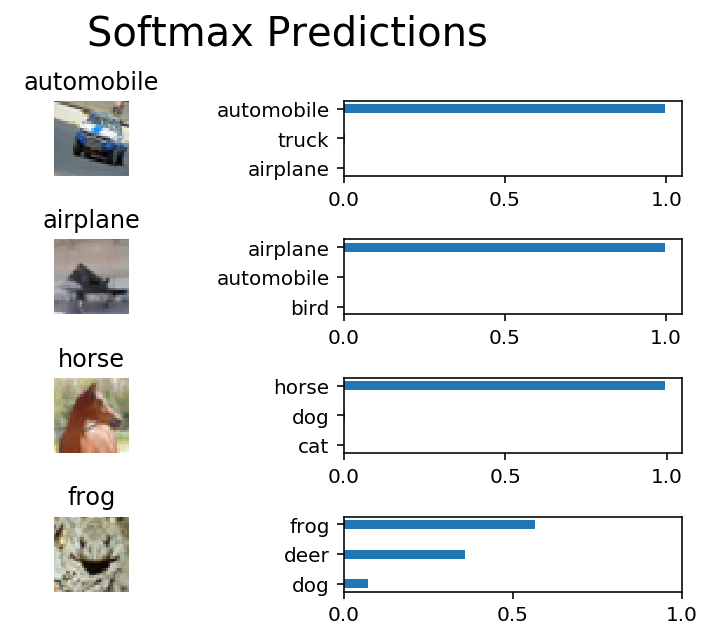

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()